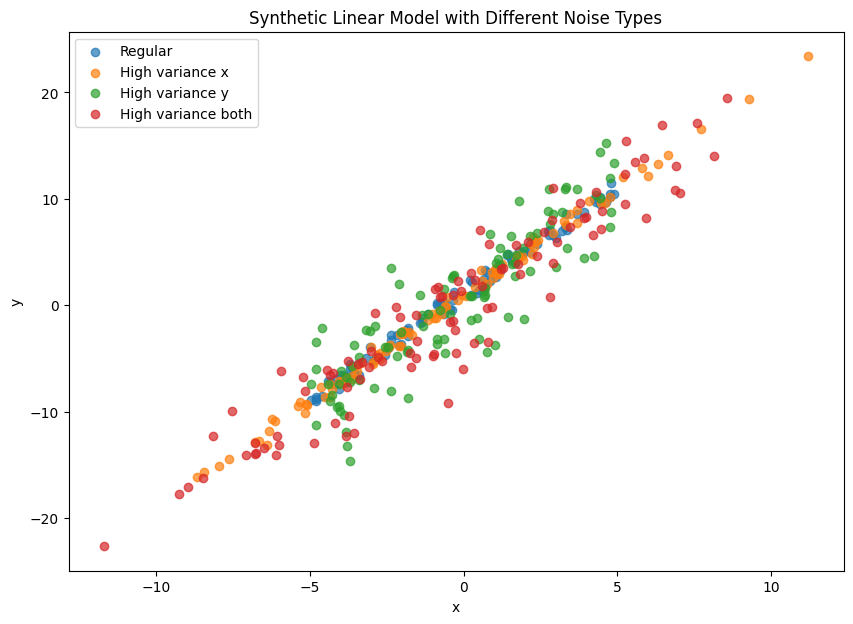

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

a = 2.0
b = 1.0
mu = 0.0
sigma_regular = 0.5
sigma_high = 3.0
n_points = 100
np.random.seed(0)
# Regular points (low noise, close to the model)
x_regular = np.random.uniform(-5, 5, n_points)
e_regular = np.random.normal(mu, sigma_regular, n_points)
y_regular = a * x_regular + b + e_regular

# High variance on x
e_x_high = np.random.normal(mu, sigma_high, n_points)
x_x_high = x_regular + e_x_high
y_x_high = a * x_x_high + b + np.random.normal(mu, sigma_regular, n_points)

# High variance on y
x_y_high = x_regular
e_y_high = np.random.normal(mu, sigma_high, n_points)
y_y_high = a * x_y_high + b + e_y_high

# High variance on both x and y
e_x_both = np.random.normal(mu, sigma_high, n_points)
e_y_both = np.random.normal(mu, sigma_high, n_points)
x_both = x_regular + e_x_both
y_both = a * x_both + b + e_y_both

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(x_regular, y_regular, label="Regular", alpha=0.7)
plt.scatter(x_x_high, y_x_high, label="High variance x", alpha=0.7)
plt.scatter(x_y_high, y_y_high, label="High variance y", alpha=0.7)
plt.scatter(x_both, y_both, label="High variance both", alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Synthetic Linear Model with Different Noise Types")
plt.show()

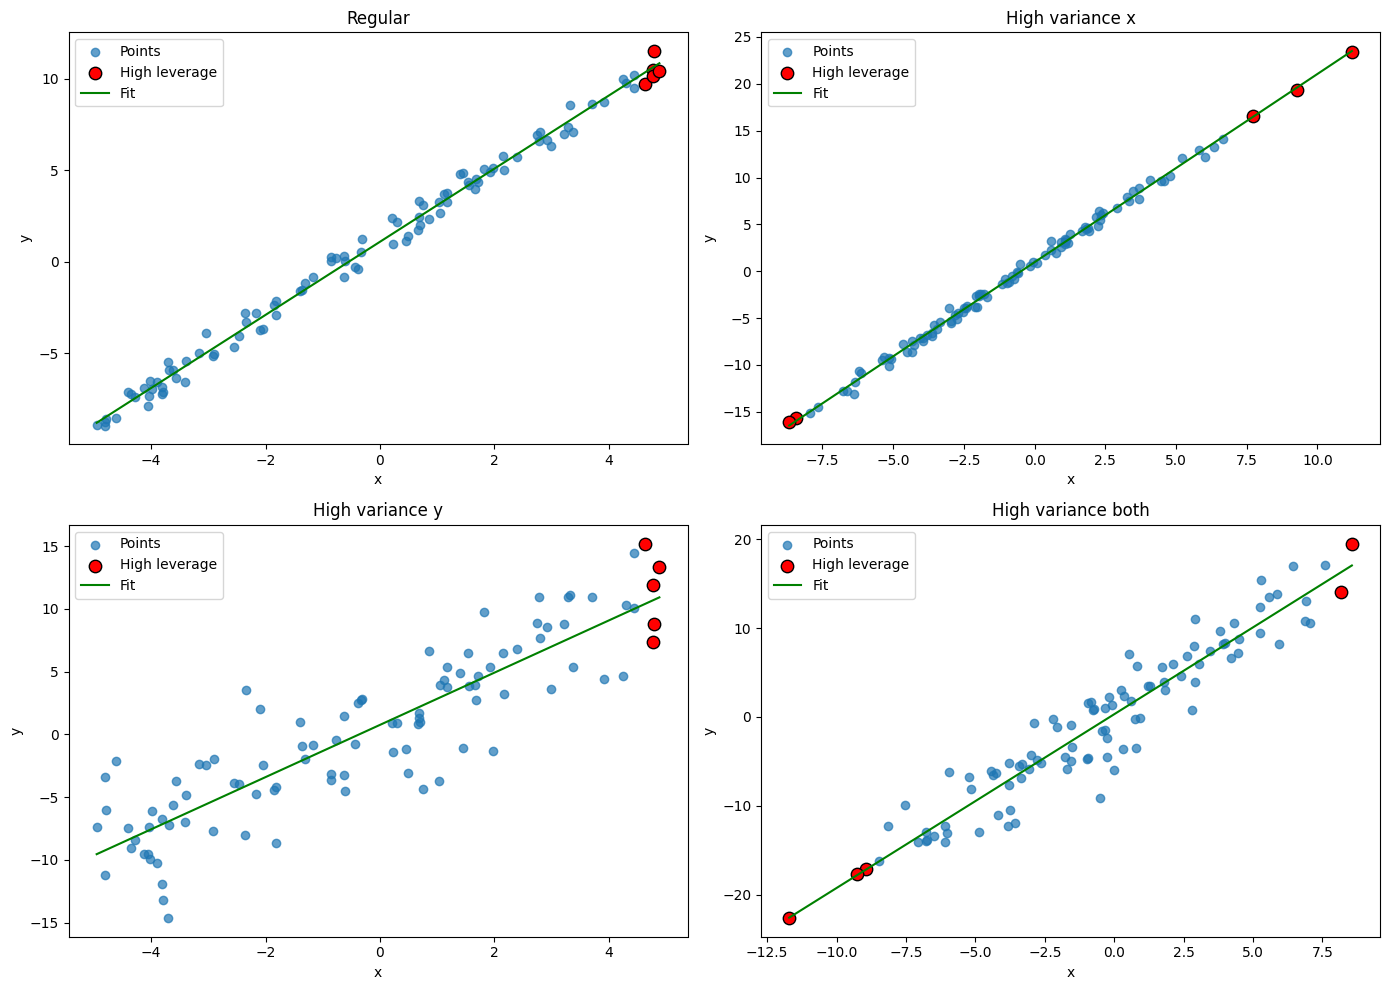

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np


# leverage = diagonal of the hat matrix H = X(X^T X)^{-1}X^T
# For 1D x, X = [x, 1]
def leverage_scores(x):
    X = np.vstack([x, np.ones_like(x)]).T
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    return np.diag(H)


point_groups = [
    (x_regular, y_regular, "Regular"),
    (x_x_high, y_x_high, "High variance x"),
    (x_y_high, y_y_high, "High variance y"),
    (x_both, y_both, "High variance both"),
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (x, y, label) in enumerate(point_groups):
    X = x.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    lev = leverage_scores(x)
    # mark top 5 leverage points
    top_idx = np.argsort(lev)[-5:]
    axes[i].scatter(x, y, label="Points", alpha=0.7)
    axes[i].scatter(
        x[top_idx],
        y[top_idx],
        color="red",
        label="High leverage",
        s=80,
        edgecolor="black",
    )
    axes[i].plot(
        np.sort(x), model.predict(np.sort(x).reshape(-1, 1)), color="green", label="Fit"
    )
    axes[i].set_title(label)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

plt.tight_layout()
plt.show()

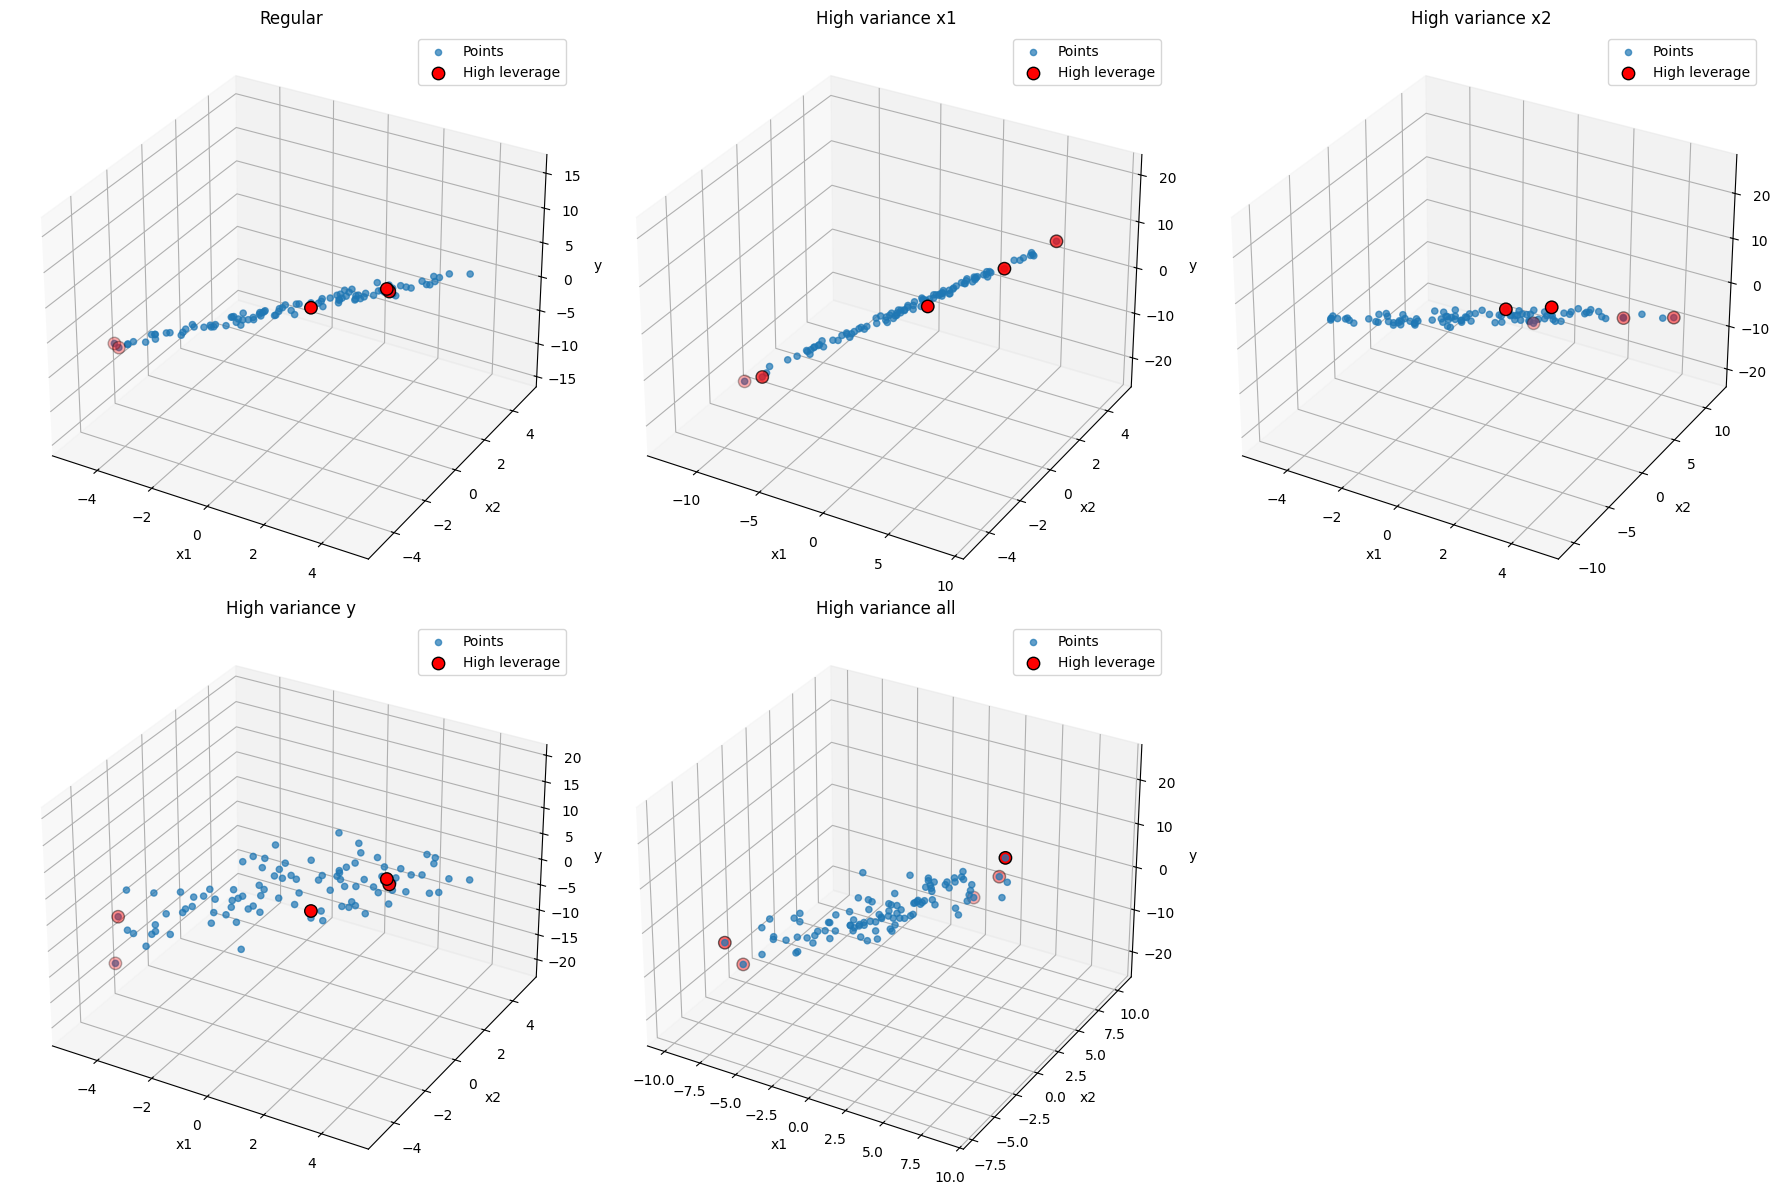

In [ ]:
# 2D case: y = a*x1 + b*x2 + c + e
import numpy as np

n_points = 100
a = 2.0
b = -1.5
c = 0.5
mu = 0.0
sigma_regular = 0.5
sigma_high = 3.0
np.random.seed(0)

# Regular points
x1_regular = np.random.uniform(-5, 5, n_points)
x2_regular = np.random.uniform(-5, 5, n_points)
e_regular = np.random.normal(mu, sigma_regular, n_points)
y_regular = a * x1_regular + b * x2_regular + c + e_regular

# High variance on x1
ex1_high = np.random.normal(mu, sigma_high, n_points)
x1_x1_high = x1_regular + ex1_high
x2_x1_high = x2_regular
y_x1_high = (
    a * x1_x1_high + b * x2_x1_high + c + np.random.normal(mu, sigma_regular, n_points)
)

# High variance on x2
ex2_high = np.random.normal(mu, sigma_high, n_points)
x1_x2_high = x1_regular
x2_x2_high = x2_regular + ex2_high
y_x2_high = (
    a * x1_x2_high + b * x2_x2_high + c + np.random.normal(mu, sigma_regular, n_points)
)

# High variance on y
ey_high = np.random.normal(mu, sigma_high, n_points)
x1_y_high = x1_regular
x2_y_high = x2_regular
y_y_high = a * x1_y_high + b * x2_y_high + c + ey_high

# High variance on all
ex1_both = np.random.normal(mu, sigma_high, n_points)
ex2_both = np.random.normal(mu, sigma_high, n_points)
ey_both = np.random.normal(mu, sigma_high, n_points)
x1_both = x1_regular + ex1_both
x2_both = x2_regular + ex2_both
y_both = a * x1_both + b * x2_both + c + ey_both


# X = [x1, x2, 1]
def leverage_scores_2d(x1, x2):
    X = np.vstack([x1, x2, np.ones_like(x1)]).T
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    return np.diag(H)


point_groups_2d = [
    (x1_regular, x2_regular, y_regular, "Regular"),
    (x1_x1_high, x2_x1_high, y_x1_high, "High variance x1"),
    (x1_x2_high, x2_x2_high, y_x2_high, "High variance x2"),
    (x1_y_high, x2_y_high, y_y_high, "High variance y"),
    (x1_both, x2_both, y_both, "High variance all"),
]

fig = plt.figure(figsize=(18, 12))
for i, (x1, x2, y, label) in enumerate(point_groups_2d):
    ax = fig.add_subplot(2, 3, i + 1, projection="3d")
    X = np.vstack([x1, x2]).T
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    lev = leverage_scores_2d(x1, x2)
    top_idx = np.argsort(lev)[-5:]
    ax.scatter(x1, x2, y, label="Points", alpha=0.7)
    ax.scatter(
        x1[top_idx],
        x2[top_idx],
        y[top_idx],
        color="red",
        label="High leverage",
        s=80,
        edgecolor="black",
    )
    ax.set_title(label)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.legend()
plt.tight_layout()
plt.show()